Since output is a numeric value, its a regression problem
Start with training dataset

In [258]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [259]:
#lets read the csv file 
B=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
B

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [260]:
#Lets convert it to a dataframe
Big_Mart=pd.DataFrame(data=B)
Big_Mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [261]:
#lets drop these attributes as they will not contribute towards out analysis
Big_Mart.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [262]:
Big_Mart.shape
#It has 8523 rows and 10 columns

(8523, 10)

In [263]:
Big_Mart

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [264]:
Big_Mart.dtypes
#It has object, float and int types data

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [265]:
#Lets find out missing values
Big_Mart.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [266]:
#Lets treat missing values under item_weight anf outlet_size
Big_Mart["Item_Weight"]=Big_Mart.Item_Weight.fillna(Big_Mart["Item_Weight"].mean())


In [267]:
Big_Mart["Outlet_Size"]=Big_Mart.Outlet_Size.fillna(Big_Mart["Outlet_Size"].mode()[0])

In [268]:
Big_Mart.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

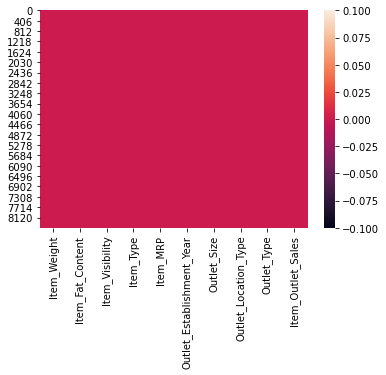

In [269]:
#Lets confirm there are no missing values using heat map
sns.heatmap(Big_Mart.isnull())
#Its confirmed that there are no missing values

In [270]:
Big_Mart.describe()
#The standard deviateion is the most for Item_MRP so the spread of data would also be the most for that
#the difference between the maximum values and 75th percentile is the most amongst the other attributes.
# the difference between the mean value and the median value is not much so the skewness should be minimal

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [271]:
le1=LabelEncoder()
Big_Mart["Item_Fat_Content"]=le1.fit_transform(Big_Mart["Item_Fat_Content"])

In [272]:
le2=LabelEncoder()
Big_Mart["Item_Type"]=le2.fit_transform(Big_Mart["Item_Type"])

In [273]:
le3=LabelEncoder()
Big_Mart["Outlet_Size"]=le3.fit_transform(Big_Mart["Outlet_Size"])

In [274]:
le4=LabelEncoder()
Big_Mart["Outlet_Location_Type"]=le4.fit_transform(Big_Mart["Outlet_Location_Type"])

In [275]:
le5=LabelEncoder()
Big_Mart["Outlet_Type"]=le5.fit_transform(Big_Mart["Outlet_Type"])

Le=Big_Mart.select_dtypes(include=[np.object])
Le

In [276]:
#lets perform univarite analysis

<AxesSubplot:xlabel='Item_Weight'>

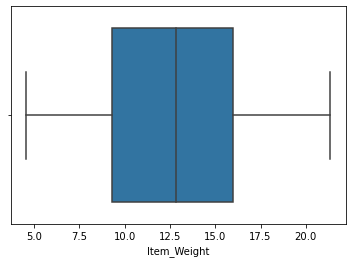

In [277]:
sns.boxplot(x="Item_Weight",data=Big_Mart)
#The minimum value is 5. The median value is 13 and the maximum value is 21.
#No outliers present

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

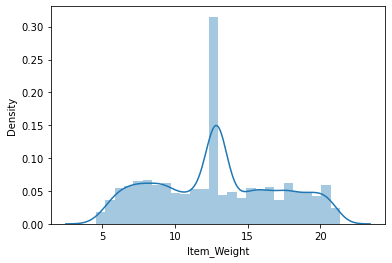

In [278]:
sns.distplot(Big_Mart["Item_Weight"])
#The density of item_weight is nearly evenly distributed

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

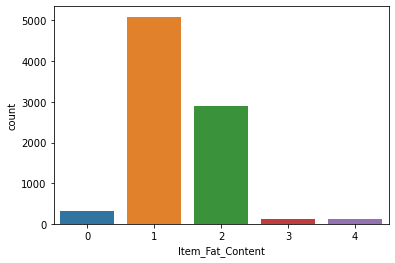

In [279]:
sns.countplot(Big_Mart["Item_Fat_Content"])
#The count of items with low fat is the most

<AxesSubplot:xlabel='Item_Visibility'>

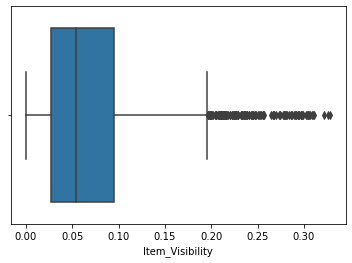

In [280]:
sns.boxplot(x="Item_Visibility",data=Big_Mart)
#The minimum value is 0 . The median value is 0.05 and the maximum value is 0.3
#Outliers are present

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

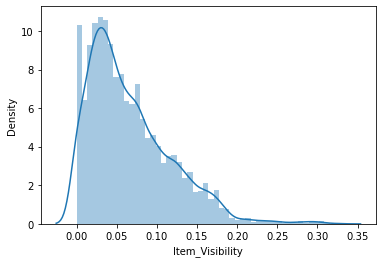

In [281]:
sns.distplot(Big_Mart["Item_Visibility"])
#It is right skewed and the maximum density lies between 0 to 0.05

<AxesSubplot:xlabel='Item_MRP'>

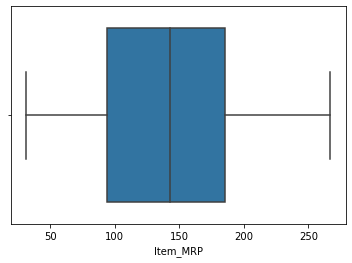

In [282]:
sns.boxplot(x="Item_MRP",data=Big_Mart)
#The minimum value is 31.3. The median value is 143 and the maximum value is 266.
#There are no outliers

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

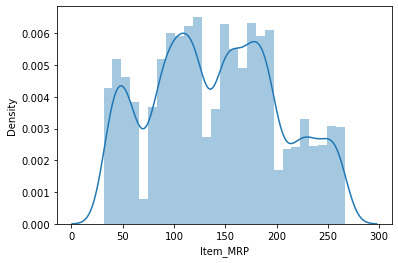

In [283]:
sns.distplot(Big_Mart["Item_MRP"])
#It keeps spiking between 50-200 price range

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

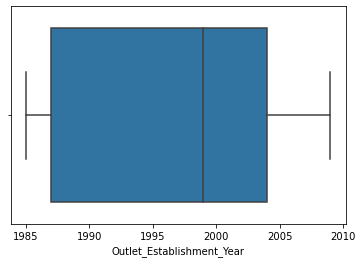

In [284]:
sns.boxplot(x="Outlet_Establishment_Year",data=Big_Mart)
#The minimum value is 1985. The median value is 1999 and the maximum value is 2009.
#There are no outliers

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

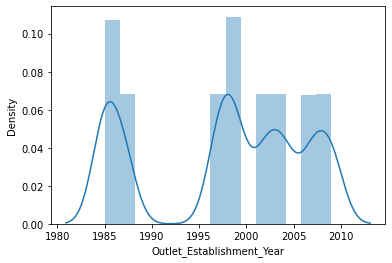

In [285]:
sns.distplot(Big_Mart["Outlet_Establishment_Year"])
#It keeps spiking between the years 1985-2000 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

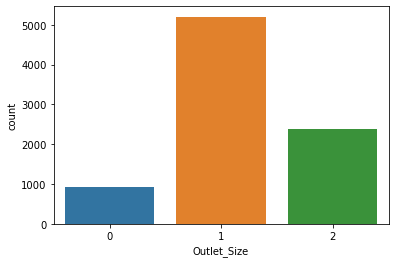

In [286]:
sns.countplot(Big_Mart["Outlet_Size"])
#The count of items with medium size is the most

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

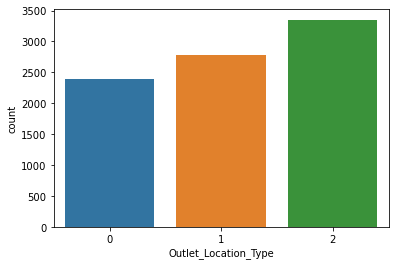

In [287]:
sns.countplot(Big_Mart["Outlet_Location_Type"])
#The count of items in tier 3 is the most

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

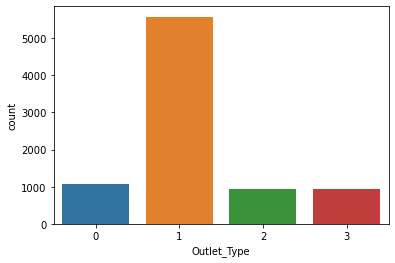

In [288]:
sns.countplot(Big_Mart["Outlet_Type"])
#The count of items in supermarket is the most

In [289]:
#Lets perform the bivariate analysis

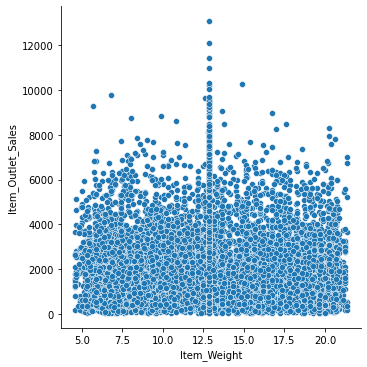

In [290]:
sns.relplot(x="Item_Weight",y="Item_Outlet_Sales",kind="scatter",data=Big_Mart)
#No concluion can be made from this

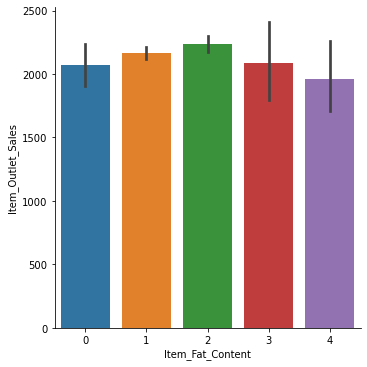

In [291]:
sns.catplot(x="Item_Fat_Content",y="Item_Outlet_Sales",kind="bar",data=Big_Mart)
#The sales of items with regular fat content is the most followed by low fat

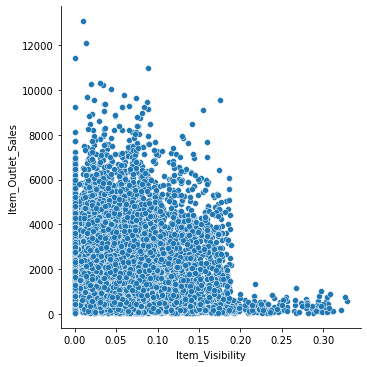

In [292]:
sns.relplot(x="Item_Visibility",y="Item_Outlet_Sales",kind="scatter",data=Big_Mart)
#No concluion can be made

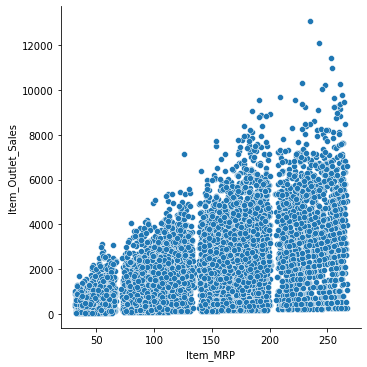

In [293]:
sns.relplot(x="Item_MRP",y="Item_Outlet_Sales",kind="scatter",data=Big_Mart)
#No conclusion can be drawn

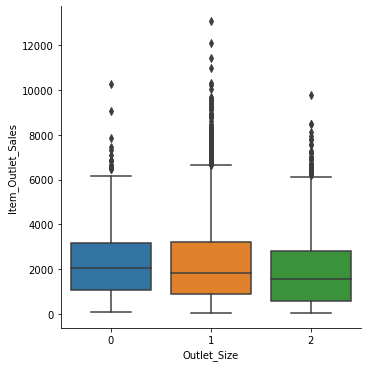

In [294]:
sns.catplot(x="Outlet_Size",y="Item_Outlet_Sales",kind="box",data=Big_Mart)
#The sales of outlet size with medium is the most

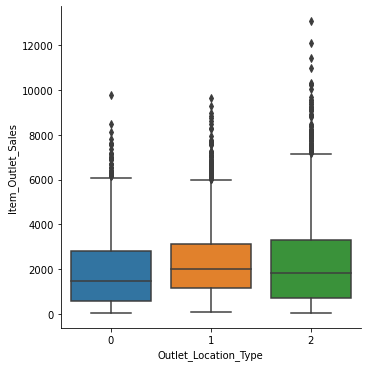

In [295]:
sns.catplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",kind="box",data=Big_Mart)
#The sales of outlet location size is the most for tier 3

In [296]:
#Since outliers are close to whiskers, there removal is not needed and hence not removing them

In [297]:
#lets check the skewness and remove skewness wherever required
Big_Mart.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [298]:
Big_Mart["Item_Visibility"]=power_transform(Big_Mart["Item_Visibility"].values.reshape(-1,1))

In [299]:
Big_Mart.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              0.124279
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [300]:
#lets separate x and y values before performing machine learning

In [301]:
x=Big_Mart.drop("Item_Outlet_Sales",axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,-1.146886,4,249.8092,1999,1,0,1
1,5.920,2,-1.037100,14,48.2692,2009,1,2,2
2,17.500,1,-1.122375,10,141.6180,1999,1,0,1
3,19.200,2,-1.745551,6,182.0950,1998,1,2,0
4,8.930,1,-1.745551,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.020310,13,214.5218,1987,0,2,1
8519,8.380,2,-0.221388,0,108.1570,2002,1,1,1
8520,10.600,1,-0.542979,8,85.1224,2004,2,1,1
8521,7.210,2,1.459990,13,103.1332,2009,1,2,2


In [302]:
y=Big_Mart["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [303]:
#Lets standardise the x variables using stadard sacler
S=StandardScaler()
x=S.fit_transform(x)
x

array([[-0.84187169, -0.57284357, -1.14688621, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.64170589,  0.97809218, -1.03709991, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 1.09855449, -0.57284357, -1.12237453, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [-0.53424315, -0.57284357, -0.54297932, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-1.33644372,  0.97809218,  1.45998957, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 0.45963367, -0.57284357, -0.27619496, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [304]:
Big_Mart.shape

(8523, 10)

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 9)
(2557, 9)
(5966,)
(2557,)


Lets use four different algorithms to check the score. We shall be using the following algorithms:
1)Linear Regression
2)Decision Tree
3)Laso
4)Ridge

In [306]:
#1) Linear Regression Algorithm

lm=LinearRegression()
lm.fit(x_train,y_train)
#predict y values
pred1=lm.predict(x_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(lm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.5103163172179905
[0.52508765 0.50372525 0.48756449 0.50570513 0.50405549]
0.5052276014094732
0.01191860483344993


In [307]:
#2)Decision Tree
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
#predict y values
pred2=dtc.predict(x_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(dtc,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.19604765932543422
[0.20701192 0.11693584 0.09798343 0.17675649 0.18545203]
0.15682794236447667
0.04192606255145044


In [308]:
#3) Lasso (It will try to omit the coefficient)
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
#predict y
pred3=ls.predict(x_test)
print(r2_score(pred3,y_test))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.1030943711083494
[0.52508763 0.50372526 0.48756451 0.50570513 0.50405548]
0.505227603640819
0.011918594375315124


In [309]:
#4) Ridge (It will try to reduce the coefficient gap)
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
#predict y
pred4=rd.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rd,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.5103163179554392
[0.52508764 0.50372525 0.4875645  0.50570513 0.50405549]
0.5052276015056194
0.011918603882930605


In [310]:
#5)randomforest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
#predict y values
pred5=rf.predict(x_test)
print(r2_score(y_test,pred5))
score5=cross_val_score(rd,x,y,cv=5)
print(score5)
print(score5.mean())
print(score5.std())

0.553008722745199
[0.52508764 0.50372525 0.4875645  0.50570513 0.50405549]
0.5052276015056194
0.011918603882930605


In [311]:
#Linear Regression is the best fit model so lets use hyper tuning

In [312]:
#Lets use randomized search cv

parameters={"fit_intercept":[True,False],"normalize":[True,False],"copy_X":[True,False],"n_jobs":[10,20,30,40]}
grid=GridSearchCV(lm,parameters)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [10, 20, 30, 40],
                         'normalize': [True, False]})

In [313]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': True}
0.5027249134357532
LinearRegression(n_jobs=10, normalize=True)


In [314]:
#lets put these best parameters back to the model

In [315]:
lm1=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=10,normalize=False)
lm1.fit(x_train,y_train)
#predict y values
pred1=lm1.predict(x_test)
print(r2_score(y_test,pred1))

0.5103163172179905


In [316]:
#lets dump the model by serialization
joblib.dump(lm,"addfile1.obj")

['addfile1.obj']

In [317]:
#start with testing dataset now

In [318]:
Big_Mart1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
Big_Mart1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [319]:
Big_Mart_Test=pd.DataFrame(data=Big_Mart1)
Big_Mart1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [320]:
#lets find missing values

In [321]:
Big_Mart1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [322]:
Big_Mart1["Item_Weight"]=Big_Mart1.Item_Weight.fillna(Big_Mart1["Item_Weight"].mean())
Big_Mart1["Item_Weight"]

0       20.750000
1        8.300000
2       14.600000
3        7.315000
4       12.695633
          ...    
5676    10.500000
5677     7.600000
5678    10.000000
5679    15.300000
5680     9.500000
Name: Item_Weight, Length: 5681, dtype: float64

In [323]:
Big_Mart1["Outlet_Size"]=Big_Mart1.Outlet_Size.fillna(Big_Mart1["Outlet_Size"].mode()[0])
Big_Mart1["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, Length: 5681, dtype: object

In [324]:
Big_Mart1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [325]:
#lets use heatmap to confirm that there are no missing values

<AxesSubplot:>

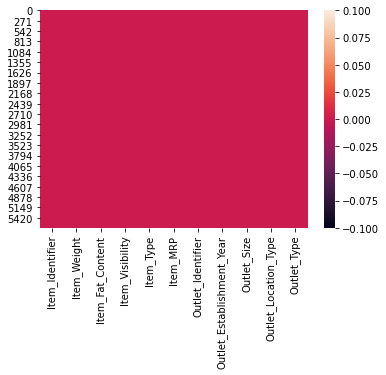

In [326]:
sns.heatmap(Big_Mart1.isnull())
#This confirms that there are no missing values present anymore

In [327]:
Big_Mart1.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [328]:
Big_Mart1.dtypes
#The data types are objects,float and int

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [329]:
Big_Mart1.describe()
#The standard deviation for item_MRP is the most and hence the spread of data would be large

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [330]:
#lets use label encoder to convert objects to numeric values

Le6=LabelEncoder()
Big_Mart1["Item_Fat_Content"]=Le6.fit_transform(Big_Mart1["Item_Fat_Content"])
Big_Mart1["Item_Fat_Content"]


0       1
1       4
2       1
3       1
4       2
       ..
5676    2
5677    2
5678    1
5679    2
5680    2
Name: Item_Fat_Content, Length: 5681, dtype: int32

In [331]:
Le7=LabelEncoder()
Big_Mart1["Item_Type"]=Le7.fit_transform(Big_Mart1["Item_Type"])
Big_Mart1["Item_Type"]

0       13
1        4
2       11
3       13
4        4
        ..
5676    13
5677    15
5678     8
5679     3
5680     3
Name: Item_Type, Length: 5681, dtype: int32

In [332]:
Le8=LabelEncoder()
Big_Mart1["Outlet_Size"]=Le8.fit_transform(Big_Mart1["Outlet_Size"])
Big_Mart1["Outlet_Size"]

0       1
1       1
2       1
3       1
4       1
       ..
5676    2
5677    1
5678    1
5679    1
5680    1
Name: Outlet_Size, Length: 5681, dtype: int32

In [333]:
Le9=LabelEncoder()
Big_Mart1["Outlet_Location_Type"]=Le9.fit_transform(Big_Mart1["Outlet_Location_Type"])
Big_Mart1["Outlet_Location_Type"]

0       0
1       1
2       2
3       1
4       2
       ..
5676    0
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Location_Type, Length: 5681, dtype: int32

In [334]:
Le10=LabelEncoder()
Big_Mart1["Item_Weight"]=Le10.fit_transform(Big_Mart1["Item_Weight"])
Big_Mart1["Item_Weight"]

0       404
1       223
2       338
3       156
4       319
       ... 
5676    293
5677    178
5678    288
5679    349
5680    283
Name: Item_Weight, Length: 5681, dtype: int64

In [335]:
Le11=LabelEncoder()
Big_Mart1["Outlet_Type"]=Le11.fit_transform(Big_Mart1["Outlet_Type"])
Big_Mart1["Outlet_Type"]

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int32

In [336]:
#lets perform univariate analysis on the independent variables

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

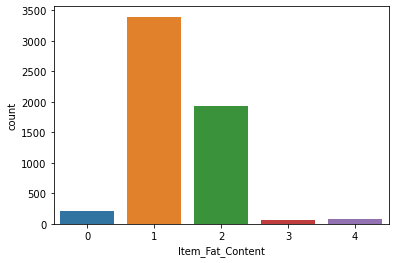

In [337]:
sns.countplot(Big_Mart1["Item_Fat_Content"])
#Item fat 1 has the maximum count

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

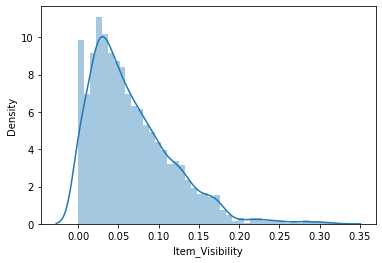

In [338]:
sns.distplot(Big_Mart1["Item_Visibility"])
#it is right skewed with maximum value that lies between 0-0.05

<AxesSubplot:xlabel='Item_Visibility'>

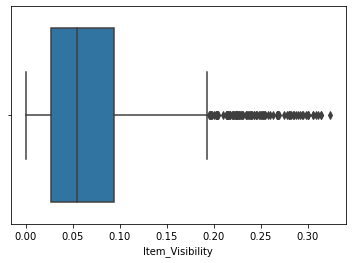

In [339]:
sns.boxplot(Big_Mart1["Item_Visibility"])
#The minimum value is 0.06. The median value is 0.05 and the maximum value is 0.32. Since there is not much difference between the 75th percentile and the maximum values, there is no need to remove the outliers

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

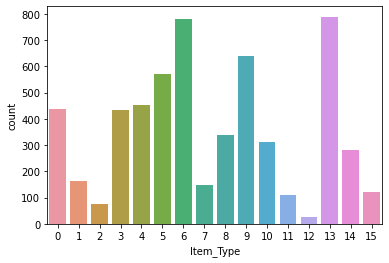

In [340]:
sns.countplot(Big_Mart1["Item_Type"])
#Type 6 has the maximum count

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

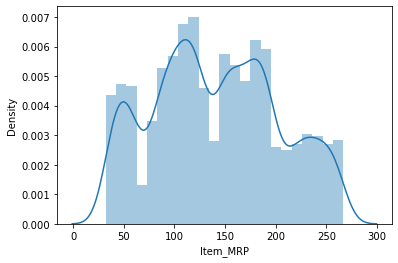

In [341]:
sns.distplot(Big_Mart1["Item_MRP"])
#the most density lies between 50-175

<AxesSubplot:xlabel='Item_MRP'>

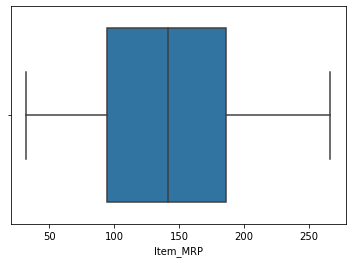

In [342]:
sns.boxplot(Big_Mart1["Item_MRP"])
#The minimum value is 32. The median value is 141 and the maximum value is 266
#No outliers are present

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

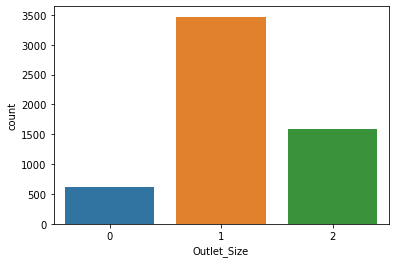

In [343]:
sns.countplot(Big_Mart1["Outlet_Size"])
#Type 6 has the maximum count

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

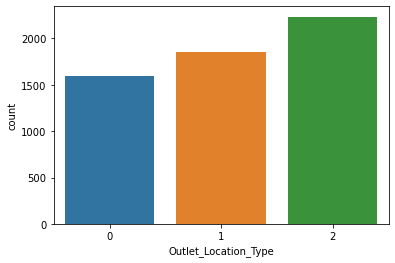

In [344]:
sns.countplot(Big_Mart1["Outlet_Location_Type"])
# 2 Outlet location type has the maximum count

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

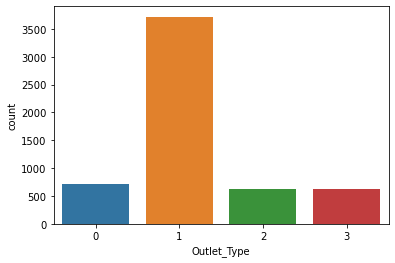

In [345]:
sns.countplot(Big_Mart1["Outlet_Type"])
# Super market type 1 has the highest count

In [346]:
Big_Mart1.skew()

Item_Weight                 -1.357647
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [347]:
Big_Mart1["Item_Visibility"]=power_transform(Big_Mart1["Item_Visibility"].values.reshape(-1,1))
Big_Mart1["Item_Weight"]=power_transform(Big_Mart1["Item_Weight"].values.reshape(-1,1))

In [348]:
Big_Mart1.skew()

Item_Weight                 -0.621398
Item_Fat_Content             0.999629
Item_Visibility              0.116776
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [361]:
z=Big_Mart1

In [363]:
#using standardscaler
S1=StandardScaler()
z=S1.fit_transform(z)

In [366]:
z.shape

(5681, 9)

In [367]:
#lets predict the sales based on these independent variables. the best fit model is linear regression
pred7=lm1.predict(z)
print("The outlet sales are:",pred7)

The outlet sales are: [2100.58635511 1419.37343437 2174.95129847 ... 1702.50378268 3442.48564192
 1082.12335269]
